# Use Case 6: Comparing Derived Molecular Data with Proteomics


This use case explores the comparison of derived molecular data with proteomics in the context of the Endometrial dataset. Here, derived molecular data refer to the newly generated variables derived from molecular data, such as pathway activity inferred from the abundance of phosphorylation sites or estimated cell type percentages from algorithms like CIBERSORT. These variables are created by comparing transcriptomics data with known profiles of pure cell types.

## Step 1: Importing packages

We will begin by importing the required Python packages including the cptac data package.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cptac
en = cptac.Ucec() # Loading the Endometrial dataset

## Step 2: Retrieving data and selecting attributes

In this use case, we will make use of two dataframes from the Endometrial dataset, namely derived_molecular and proteomics. We will load the derived_molecular dataframe using the 'ancestry_prediction' type from the 'haromonized' source and examine the data. For future reference, valid types of derived_molecular data are xcell, cibersort, ancestry_prediction, and hla_typing, with xcell and cibersort being deconvolutions.

In [2]:
der_molecular = en.get_derived_molecular(type='ancestry_prediction', source='harmonized')

To look at the available columns in the dataset, we can do the following:

In [3]:
der_molecular.columns

Index(['cancer_type', 'self_reported_race', 'self_reported_ethnicity',
       'self_reported_ethnicity_race_ancestry_identified',
       'self_reported_participant_country', 'washU_pred_ancestry',
       'mssm_pred_anc', 'consensus_pred_ancestry'],
      dtype='object', name='Name')

We will focus on comparing the 'washU_pred_ancestry' with the abundance of the JAK1 protein. To see all of the possible values for any column, you can use the pandas function .unique()

In [4]:
der_molecular['washU_pred_ancestry'].unique()

array(['EUR', 'AMR', 'SAS', 'AFR'], dtype=object)

## Step 3: Joining dataframes

To join our chosen molecular trait with the proteomics data, we will utilize the en.join_metadata_to_omics function. Please note that the 'type' parameter should be used as the 'metadata_name' argument in the en.join_metadata_to_omics function.

In [5]:
joined_data = en.join_metadata_to_omics(
    metadata_name="ancestry_prediction",
    metadata_source="harmonized",
    metadata_cols='washU_pred_ancestry',
    omics_name="proteomics",
    omics_source="umich"
)

## Step 4: Plotting the data

We will now visualize the joined data using seaborn and matplotlib libraries. We will create a boxplot and a histogram that illustrate our data. For more details on seaborn, refer to this [Seaborn tutorial](https://seaborn.pydata.org/tutorial.html).

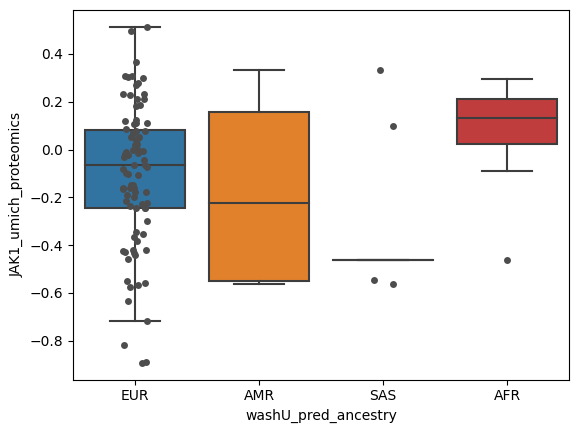

cptac warning: Your version of cptac (1.5.1) is out-of-date. Latest is 1.5.0. Please run 'pip install --upgrade cptac' to update it. (C:\Users\sabme\anaconda3\lib\threading.py, line 910)
C:\Users\sabme\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(*plot_args, **plot_kwargs)


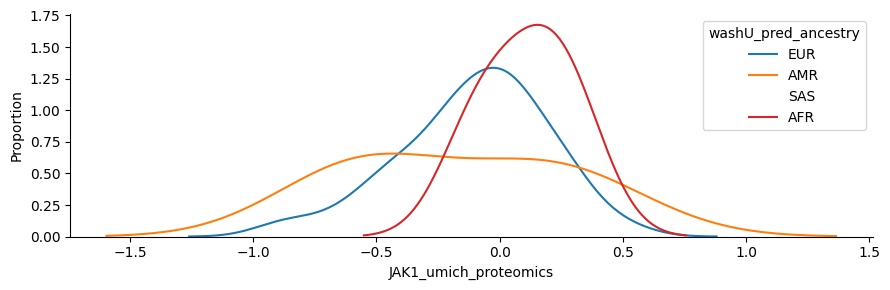

In [6]:
macrophages_boxplot = sns.boxplot(x='washU_pred_ancestry', y='JAK1_umich_proteomics', data=joined_data, showfliers=False)
macrophages_boxplot = sns.stripplot(x='washU_pred_ancestry', y='JAK1_umich_proteomics', data=joined_data, color = '.3')
plt.show()

macrophages_histogram = sns.FacetGrid(joined_data[['washU_pred_ancestry', 'JAK1_umich_proteomics']], hue="washU_pred_ancestry", 
                              legend_out=False, aspect=3)
macrophages_histogram = macrophages_histogram.map(sns.kdeplot, "JAK1_umich_proteomics").add_legend(title="washU_pred_ancestry")
macrophages_histogram.set(ylabel='Proportion')
plt.show()